In [61]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from fidap import fidap_client
import config
from config import api_key

# instantiate api connection
fidap = fidap_client(api_key=api_key)

In [9]:
covid_states = fidap.sql("""
SELECT
    name,
    employed_persons,
    population,
    covid_19_patient_recovered / covid_19_test_positive as covid_recovered_to_positive,
    covid_19_patient_deceased / covid_19_test_positive as covid_deceased_to_positive,
    median_age,
    inemployment_rate,
    retail_concaine_distribution
FROM fidap-301014.datacommons.states
ORDER BY population DESC
LIMIT 15
"""   
)

In [11]:
covid_states

,name,employed_persons,population,covid_recovered_to_positive,covid_deceased_to_positive,median_age,inemployment_rate,retail_concaine_distribution
0,California,17342568,39250017,NaN,0.018064,36.5,8.3,828.100000
1,Texas,13064687,28995881,0.931440,0.019232,34.6,6.9,408.460063
2,Florida,9695343,20271272,NaN,0.019261,42.0,4.7,271.560000
3,New York,8719076,19795791,NaN,0.031382,38.8,8.5,327.520002
4,Illinois,5693253,12859995,NaN,0.021048,38.1,7.1,333.960013
5,Pennsylvania,5874780,12802503,0.908409,0.028744,40.8,7.3,377.460008
6,Ohio,5479391,11613423,0.946022,0.020298,39.4,4.7,183.280001
7,North Carolina,4757553,10383620,NaN,0.015021,38.7,5.2,142.540001
8,Georgia,4929108,10214860,NaN,0.019717,36.7,4.5,184.130014
9,Michigan,4464345,9922576,0.838141,0.031035,39.7,5.1,381.550000


In [49]:
nl_bounding_area = fidap.sql("""
(SELECT geometry from `bigquery-public-data.geo_openstreetmap.planet_features_multipolygons`
        WHERE ('name:en', 'Netherlands') in (SELECT (key, value) from unnest(all_tags))
          AND ('boundary', 'administrative') in (SELECT (key, value) from unnest(all_tags))
          AND ('admin_level', '3') in (SELECT (key, value) from unnest(all_tags))
     )

""")

In [58]:
from shapely import wkt
nl_bounding_area['geometry'] = nl_bounding_area['geometry'].apply(wkt.loads)
nl_bounding_area_gdf = gpd.GeoDataFrame(nl_bounding_area, geometry = 'geometry')

<AxesSubplot:>

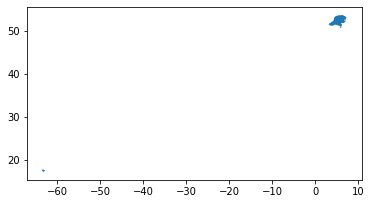

In [64]:
nl_bounding_area_gdf.plot()

In [45]:
bus_stops = fidap.sql("""
SELECT COUNT(*) AS stops_count,
    (SELECT value FROM unnest(all_tags) 
        WHERE key = 'network'
        AND value IN ('Muni', 'RMV', 'SPTRANS', 'VOR', 'Transitlink') ) AS bus_network
FROM bigquery-public-data.geo_openstreetmap.planet_features_points
WHERE ('highway', 'bus_stop') IN (SELECT (key, value) FROM UNNEST(all_tags))
GROUP BY bus_network
ORDER BY stops_count DESC;

""")

In [46]:
bus_stops

,stops_count,bus_network
0,2756534,None
1,16751,RMV
2,16223,SPTRANS
3,15367,VOR
4,3002,Muni
